En este cuaderno se implementan algunas funciones y algunos segmentos de código que pueden ser útiles para el desarrollo del [Taller 1](https://github.com/andresgm/Herramientas-Computacionales/tree/master/02_taller01) del curso.  

Comienzo importando dos librerías que no habíamos usado hasta ahora en el curso.

La librería os nos permite interactuar con algunas funcionalidades del sistema operativo. La vamos a utilizar para construir rutas a archivos que sean independientes del sistema operativo utilizado.

La librería pandas es muy utilizada para análisis de datos. En primera instancia implementa una estructura de datos llamada 'dataframe' similar a una hoja de calculo. Adicionalmente, implementa numerosas funciones para realizar calculos estadísticos sobre estas estructuras.

In [1]:
import os
import pandas as pd

Tradicional comando para facilitar el cálculo interactivo.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


En la siguiente celda muestro cómo podemos leer los datos desde archivos .csv a pandas dataframes.

Acá se puede apreciar el uso de *os.path.join* para la creación de las rutas de los archivos. 

Noten la configuración de la función pd.read_csv. El parámetro sep=';' determina que las variables están separadas por punto y coma y no por coma. El encoding='latin-1' permite leer correctamente caracteres como la 'ñ'.

In [3]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Valledupar'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

In [4]:
serie_pd.head

<bound method NDFrame.head of         AÑO  MES  DIA  HORA       IDEAM
0      2006    1    1     0    0.000000
1      2006    1    1     1    0.000000
2      2006    1    1     2    0.000000
3      2006    1    1     3    0.000000
4      2006    1    1     4    0.000000
5      2006    1    1     5    0.000000
6      2006    1    1     6    0.000000
7      2006    1    1     7   41.559251
8      2006    1    1     8  238.699288
9      2006    1    1     9  455.020517
10     2006    1    1    10  624.454387
11     2006    1    1    11  734.213434
12     2006    1    1    12  777.903929
13     2006    1    1    13  757.657114
14     2006    1    1    14  706.507267
15     2006    1    1    15  586.092001
16     2006    1    1    16  412.395644
17     2006    1    1    17  206.730633
18     2006    1    1    18   25.574924
19     2006    1    1    19    0.000000
20     2006    1    1    20    0.000000
21     2006    1    1    21    0.000000
22     2006    1    1    22    0.000000
23     200

En la siguiente celda, implemento dos funciones útiles para realizar algunos de los cálculo necesarios para el cálculo de la ENFICC como está determinado en la [Resolución CREG 071 de 2006](http://apolo.creg.gov.co/Publicac.nsf/1c09d18d2d5ffb5b05256eee00709c02/4f8f33924247ce4a0525785a007a6d74?OpenDocument).  

La función *ghi_mensual* calcula la energía total en $kWh/m^2$ para cada mes en la serie de datos. Con esta información, la función *ghi_dia* calcula el promedio diario de cada mes.

In [5]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes))
                                         ,"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),
                "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

En la siguiente celda se utilizan las dos funciones definidas previamente y se organizan los valores promedio mensuales.

In [10]:
ghi_mensual_loc = ghi_mensual(serie_pd)
ghi_diario_loc = ghi_dia(ghi_mensual_loc)
datos_IDEAM = sorted(ghi_diario_loc["GHIdiario"])
print(ghi_diario_loc)

        AÑO   MES  GHIdiario
0    2006.0   1.0   5.426402
1    2006.0   2.0   6.049858
2    2006.0   3.0   5.602049
3    2006.0   4.0   5.352159
4    2006.0   5.0   5.604888
5    2006.0   6.0   5.602158
6    2006.0   7.0   5.362423
7    2006.0   8.0   5.683691
8    2006.0   9.0   5.211831
9    2006.0  10.0   5.119954
10   2006.0  11.0   5.250348
11   2006.0  12.0   5.433051
12   2007.0   1.0   5.574657
13   2007.0   2.0   6.019441
14   2007.0   3.0   5.539717
15   2007.0   4.0   5.691355
16   2007.0   5.0   4.936006
17   2007.0   6.0   5.949760
18   2007.0   7.0   5.730243
19   2007.0   8.0   5.225471
20   2007.0   9.0   5.076315
21   2007.0  10.0   4.804463
22   2007.0  11.0   5.014997
23   2007.0  12.0   5.423405
24   2008.0   1.0   5.726034
25   2008.0   2.0   5.824592
26   2008.0   3.0   5.473850
27   2008.0   4.0   5.683294
28   2008.0   5.0   5.412217
29   2008.0   6.0   5.546663
..      ...   ...        ...
90   2013.0   7.0   5.633788
91   2013.0   8.0   5.068445
92   2013.0   

A continuación hago una sencilla gráfica de la distribución de energía promedio mensual.

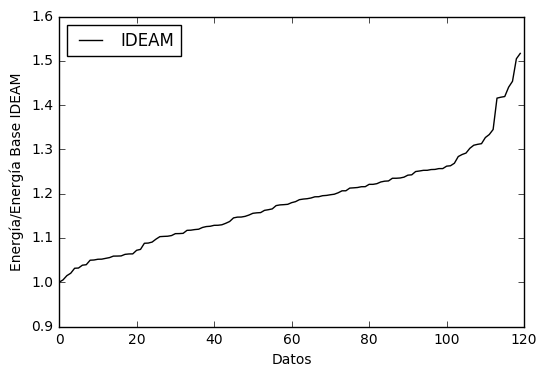

In [7]:
pylab.xlabel("Datos")
pylab.ylabel("Energía/Energía Base IDEAM")
numdatos = range(len(datos_IDEAM))
pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
pylab.legend(loc='upper left')
pylab.savefig(os.path.join(output_dir,'valledupar_IDEAM.png'), dpi=600)

Finalmente, se calcula el percentil correspondiente al valor de la ENFICC que se desea calcular.

In [8]:
percentil = 0.01
enficc = ghi_diario_loc.quantile(q=percentil, 
                                 numeric_only=True)["GHIdiario"]
print('La ENFICC 99% es: ', enficc)

La ENFICC 99% es:  4.56900737661


In [9]:
ghi_mensual_loc

,AÑO,MES,DIAS,GHImes
0,2006.0,1.0,31.0,168.218469
1,2006.0,2.0,28.0,169.396030
2,2006.0,3.0,31.0,173.663512
3,2006.0,4.0,30.0,160.564778
4,2006.0,5.0,31.0,173.751526
5,2006.0,6.0,30.0,168.064743
6,2006.0,7.0,31.0,166.235127
7,2006.0,8.0,31.0,176.194425
8,2006.0,9.0,30.0,156.354936
9,2006.0,10.0,31.0,158.718576
